# Fältanalys

![](pcb.png)

## Metod
För att lösa denna uppgiften kommer vi numeriskt lösa laplace ekvationen

In [5]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#Här definerar vi rutnätet och alla detaljer på kretskortet

s = 2
Nx = 32 * s
Ny = 38 * s

V = np.zeros((Nx,Ny))

print(V.shape)
    
def rand(V,Nx,Ny):
    V[0,:] = -10
    V[Nx-1,:] = 5
    V[:,0] = V[:,1]
    V[:,Ny-1] = V[:,Ny-2]

def komp(V):
    #A
    V[0:10*s, 27*s:28*s] = -10
    V[10*s:19*s, 23*s:32*s] = -10
    #B
    V[22*s:32*s, 10*s:11*s] = 5
    V[13*s:22*s, 6*s:15*s] = 5
    
rand(V,Nx,Ny)
komp(V)

(64, 76)


(64, 76) (64, 76)


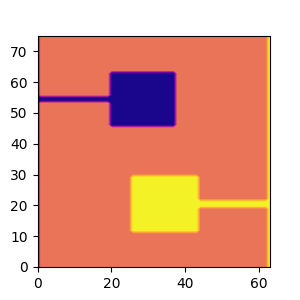

In [7]:
X, Y = np.meshgrid(np.arange(Ny), np.arange(Nx))
print(X.shape, Y.shape)
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(Y, X, V, 30, cmap='plasma')

In [8]:
#Här använder vi fyrpunktsformeln för att iterativt lösa laplace ekvationen

count = 0
while True:
    V_old = V.copy()
    for x in range(1,Nx-1) :
        for y in range(1,Ny-1) :
            V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4
    komp(V)
    rand(V,Nx,Ny)
    
    count += 1

    if abs(V_old-V).mean() < (10**-8) and count > 100:
        break

print(count)

(Ex, Ey) = np.gradient(-V)
Emag = np.sqrt(Ex**2 + Ey**2)


2232


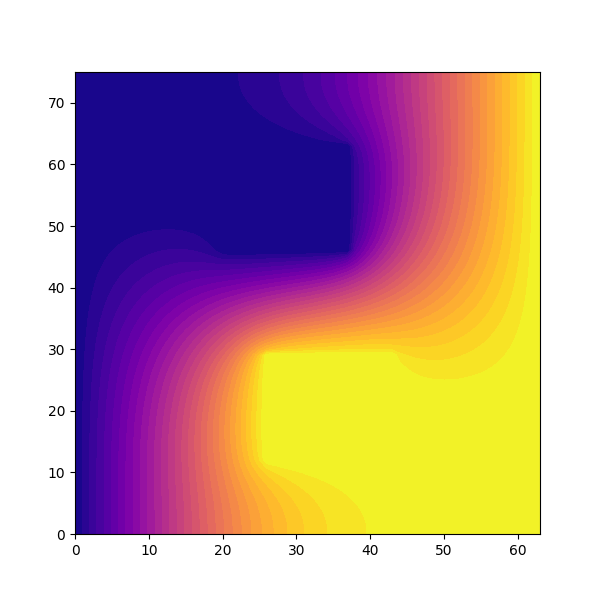

In [9]:
#Här ritar vi potentialen
X, Y = np.meshgrid(np.arange(Ny), np.arange(Nx))
fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(Y, X, V, 30, cmap='plasma')

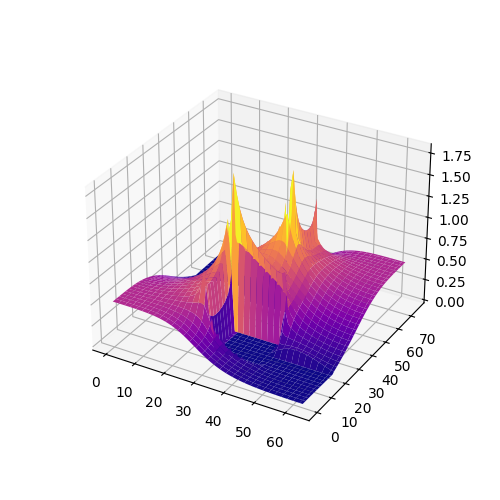

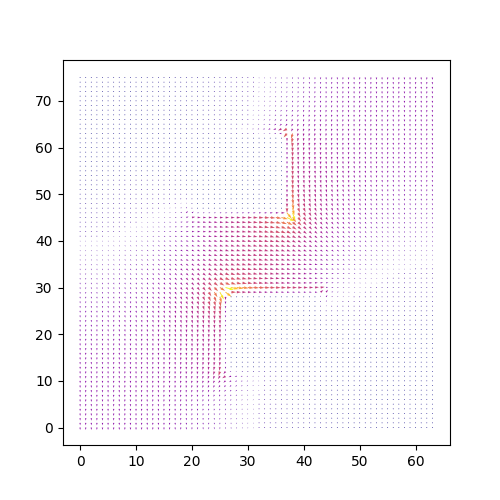

In [10]:
#Här ritar vi fältbilden
# fält styrka 
fig2, ax2 = plt.subplots(figsize=(5,5),subplot_kw=dict(projection='3d'))
ax2.plot_surface(Y, X, Emag, cmap='plasma')

# fält linjer med quiver
fig3, ax3 = plt.subplots(figsize = (5,5))
ax3.quiver(Y, X, Ey, Ex, Emag, scale=80, cmap='plasma')

Potentialen i mitten är -2.980625008189435 V och fältstyrkan är ...


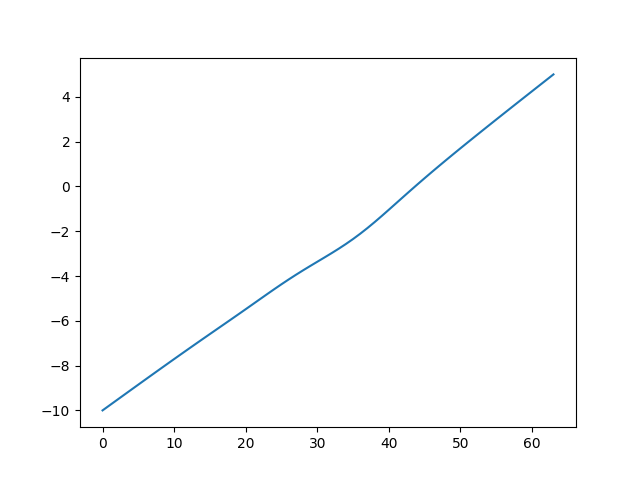

In [12]:
#Här ritar vi fältet och potentialen längs den efterfrågade mittlinjen
mittlinje = V[0:, 19*s]
x = np.arange(0,32*s)

print(f'Potentialen i mitten är {mittlinje[16*s]} V och fältstyrkan är ...')

fig, ax = plt.subplots()
ax.plot(x,mittlinje)

## Resultat